**<font size= 7>Questions we want to explore:</font>**

~1. How many jobs are currently available on the Indian market?~

~2. How many jobs are available in the data domain?~

~3. Which job roles have the highest demand?~

~4. Which are the most in-demand skills for the Indian market?~

<font size= 6>5. Which jobs are the highest paid in India?</font>

<sup><sub>6. Top 10 companies in India?</sup></sub>

<sup><sub>7. How many jobs have remote opportunities?</sup></sub>

<sup><sub>8. What are the types of skills in demand?</sup></sub>

<sup><sub>9. Which platform has more data roles posted?</sup></sub>

<sup><sub>10. Top 10 companies providing health insurance?</sup></sub>


In [13]:
!pip install datasets
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df.sample(5)


Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\User\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Tue Aug 20 15:52:27 2024).


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
172252,Data Scientist,People Analytics and Insights Analyst,"Madrid, Spain",via BeBee,Full-time,False,Spain,2023-09-08 15:57:32,False,False,Spain,None,NaN,NaN,FeverUp,"[sql, tableau, power bi]","{'analyst_tools': ['tableau', 'power bi'], 'pr..."
464415,Senior Data Engineer,Senior Business Data Engineer,None,via LinkedIn,Full-time,False,"Illinois, United States",2023-08-09 14:07:20,False,False,United States,year,135000.0,NaN,Luxoft,"[java, python, sql, javascript, azure, snowfla...","{'analyst_tools': ['tableau', 'alteryx'], 'asy..."
139922,Machine Learning Engineer,Specialist: Machine learning (ML) Engineer,"Addis Ababa, Ethiopia",via Harmeejobs,Full-time,False,Ethiopia,2023-02-25 08:56:02,False,False,Ethiopia,None,NaN,NaN,Safaricom,"[r, sql, python, scala, java, c++, hadoop, tab...","{'analyst_tools': ['tableau', 'power bi'], 'li..."
270650,Data Engineer,Data Engineer,"Bengaluru, Karnataka, India",via LinkedIn,Full-time,False,India,2023-06-07 07:31:29,True,False,India,None,NaN,NaN,InCred Financial Services,"[nosql, mongodb, mongodb, dynamodb, aws, datab...","{'cloud': ['aws', 'databricks'], 'databases': ..."
603350,Senior Data Scientist,Senior Data Scientist,"Bengaluru, Karnataka, India",via Wellfound,Full-time,False,India,2023-11-12 09:08:27,False,False,India,None,NaN,NaN,Niti.AI,"[python, sql, numpy, pandas, tensorflow, matpl...","{'analyst_tools': ['excel'], 'libraries': ['nu..."


In [14]:
df_india = df[df['job_country'] == 'India'].copy()
df_india.sample(5)

# We can observe so many null (NaN) values in the 'salary_year_avg' column. To make our analysis more meaningful, we will remove? the null values first.

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
12089,Data Scientist,Analyst - Data Scientist,India,via Indeed,Full-time,False,India,2023-06-15 13:27:09,False,False,India,None,NaN,NaN,United Airlines,"[r, python, sql]","{'programming': ['r', 'python', 'sql']}"
538756,Data Scientist,Data Scientist - (Job Number: CREQ155255),"Bengaluru, Karnataka, India",via Talentify.io,Full-time,False,India,2023-01-18 19:13:37,False,False,India,None,NaN,NaN,Virtusa,[sql],{'programming': ['sql']}
7734,Data Engineer,Big Data Engineer,Anywhere,via Indeed,Full-time,True,India,2023-10-25 13:12:38,True,False,India,None,NaN,NaN,RARR Technologies Pvt Ltd,"[python, scala, aws, redshift, pyspark, flow, ...","{'cloud': ['aws', 'redshift'], 'libraries': ['..."
590491,Data Scientist,Urgently Want Data Science Instructor at Home ...,"Ranchi, Jharkhand, India",via LinkedIn,Full-time,False,India,2023-11-14 09:10:40,False,False,India,None,NaN,NaN,UrbanPro.com,[python],{'programming': ['python']}
605356,Senior Data Analyst,Senior Data Analyst,India,via Indeed,Full-time,False,India,2023-09-11 09:12:22,True,False,India,None,NaN,NaN,CeX,"[python, r, nosql, sql, mysql, bigquery, redsh...","{'analyst_tools': ['excel', 'sheets', 'tableau..."


In [15]:
df_india = df_india.dropna(subset= ['salary_year_avg'])
df_india.sample(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
186125,Software Engineer,Senior Software Engineer- MLOps Platform DevOp...,India,via Ai-Jobs.net,Full-time,False,India,2023-12-06 15:08:51,False,False,India,year,64800.0,NaN,Bristol Myers Squibb,"[sql, shell, python, aws, spark, angular, unix...","{'analyst_tools': ['excel'], 'cloud': ['aws'],..."
510246,Senior Data Engineer,Sr Data Engineer - Territory Innovation,India,via Ai-Jobs.net,Full-time,False,India,2023-12-29 11:10:36,False,False,India,year,153500.0,NaN,Gartner,"[python, sql, postgresql, aws, pyspark, pandas...","{'cloud': ['aws'], 'databases': ['postgresql']..."
395254,Business Analyst,IN BGSW SystemTester AutonomousDriving EXM 202...,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-06-02 18:31:11,False,False,India,year,79200.0,NaN,Bosch Group,"[perl, python, bitbucket, jira]","{'async': ['jira'], 'other': ['bitbucket'], 'p..."
209858,Data Engineer,Data Engineer/ML,India,via Ai-Jobs.net,Full-time,False,India,2023-01-09 22:12:06,False,False,India,year,147500.0,NaN,Tookitaki,None,None
613935,Data Analyst,Data Analyst,"Visakhapatnam, Andhra Pradesh, India",via Ai-Jobs.net,Full-time,False,India,2023-06-07 12:30:54,True,False,India,year,100500.0,NaN,Openlogix Corporation,[flow],{'other': ['flow']}


In [16]:
df_india.info

<bound method DataFrame.info of                   job_title_short  \
1209    Machine Learning Engineer   
2022                Data Engineer   
2785                Data Engineer   
3190         Senior Data Engineer   
3930               Data Scientist   
...                           ...   
783733      Senior Data Scientist   
784033               Data Analyst   
784768             Data Scientist   
785395              Data Engineer   
785515               Data Analyst   

                                                job_title  \
1209                      Computer Vision Developer (R&D)   
2022                       Data Engineer - SQL (Power BI)   
2785    Staff Software Engineer - Data Engineering (Ja...   
3190         Senior Big Data DevOps & Deployment Engineer   
3930                                  Lead Data Scientist   
...                                                   ...   
783733                              Senior Data Scientist   
784033                           Re

In [17]:
job_titles = df_india['job_title_short'].value_counts().index[:7].tolist()
job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer',
 'Senior Data Scientist']

In [18]:
df_india_top7 = df_india[df_india['job_title_short'].isin(job_titles)]
df_india_top7.head(15)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1209,Machine Learning Engineer,Computer Vision Developer (R&D),"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-02-18 13:12:30,False,False,India,year,79200.0,NaN,Bosch Group,"[python, opencv, tensorflow, pytorch, keras, m...","{'libraries': ['opencv', 'tensorflow', 'pytorc..."
2022,Data Engineer,Data Engineer - SQL (Power BI),India,via Ai-Jobs.net,Full-time,False,India,2023-10-31 13:09:54,False,False,India,year,156500.0,NaN,Gartner,"[java, t-sql, sql, azure, power bi, dax, notion]","{'analyst_tools': ['power bi', 'dax'], 'async'..."
2785,Data Engineer,Staff Software Engineer - Data Engineering (Ja...,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-05-26 13:13:28,False,False,India,year,147500.0,NaN,Zscaler,"[java, nosql, neo4j, redshift, aws, spring, sp...","{'analyst_tools': ['excel'], 'cloud': ['redshi..."
3190,Senior Data Engineer,Senior Big Data DevOps & Deployment Engineer,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-07-07 13:14:21,False,False,India,year,79200.0,NaN,ServiceNow,"[sql, perl, bash, groovy, python, shell, redis...","{'analyst_tools': ['tableau'], 'cloud': ['azur..."
3930,Data Scientist,Lead Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-12-12 13:27:33,False,False,India,year,114516.0,NaN,Boeing,"[python, r, c++, tensorflow, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
7195,Software Engineer,BI Developer,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-02-13 13:28:38,False,False,India,year,79200.0,NaN,Pattern,"[sql, oracle, snowflake, tableau]","{'analyst_tools': ['tableau'], 'cloud': ['orac..."
7946,Data Engineer,Data Engineering Manager,"Mysuru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-07-28 13:10:54,False,False,India,year,147500.0,NaN,66degrees,"[sql, gcp, bigquery]","{'cloud': ['gcp', 'bigquery'], 'programming': ..."
9143,Data Scientist,Manager - Data Science,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-05-12 13:28:49,False,False,India,year,79200.0,NaN,BitGo,"[sql, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,"[python, sql, aws, azure, excel, jenkins, git]","{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
16358,Data Scientist,Data Scientist,India,via Ai-Jobs.net,Full-time,False,India,2023-07-19 13:12:35,False,False,India,year,157500.0,NaN,Silent Eight,"[python, sql, bash, postgresql, pandas, pyspar...","{'async': ['jira', 'confluence'], 'databases':..."


In [19]:
job_order = df_india_top7.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending= False).index.to_list()
job_order

['Senior Data Scientist',
 'Data Engineer',
 'Senior Data Engineer',
 'Data Scientist',
 'Data Analyst',
 'Machine Learning Engineer',
 'Software Engineer']

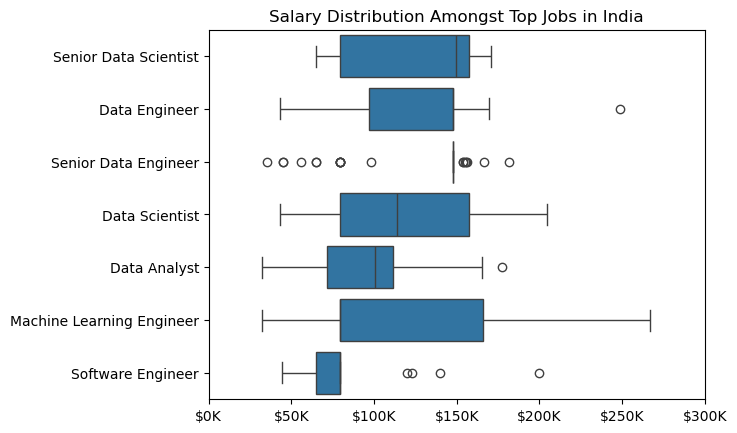

In [20]:
import seaborn as sns

sns.boxplot(data= df_india_top7, x= 'salary_year_avg', y= 'job_title_short', order= job_order)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.title('Salary Distribution Amongst Top Jobs in India')
plt.xlabel('')
plt.ylabel('')
plt.xlim(0, 300000)
plt.show()

## Insights from This Plot:
* Senior Data Scientists seem to have one of the highest median salaries with a narrower range, meaning most earn within a predictable range.
* Machine Learning Engineers and Data Engineers have a wider range, suggesting high salary variation.
* Software Engineers have the lowest median salary, but a few individuals earn very high salaries (outliers).
* Data Analysts tend to have a lower median salary and a more compact range, meaning salaries are less spread out.

For Senior Data Engineer, here’s what the box plot indicates:

1. Median Salary
The median salary for Senior Data Engineers is relatively high, suggesting that most professionals in this role earn well.
The median is positioned towards the upper half of the box, indicating that more salaries are concentrated in the higher range.
2. Salary Variation (Interquartile Range - IQR)
The box is moderately wide, meaning there is some variation in salaries, but it’s not extreme.
This suggests that while salaries for Senior Data Engineers differ, they are somewhat predictable within a range.
3. Outliers
There are multiple outliers on the higher end, indicating that some Senior Data Engineers earn significantly higher salaries than the rest.
This could be due to differences in experience, location, or working in top-paying companies.
4. Whiskers (Min & Max Salaries)
The upper whisker extends well beyond the box, suggesting that a good number of Senior Data Engineers earn above the 75th percentile.
The lower whisker is relatively shorter, meaning very few Senior Data Engineers earn significantly below the average.
Conclusion
Senior Data Engineers generally earn well with a high median salary.
There is moderate variation in salaries, with some earning significantly higher amounts.
If you’re targeting this role, moving towards the top 25% or outlier range may require specialized skills, experience, or working at top firms.



In [21]:
df_india[df_india['job_title_short'] == 'Data Analyst']['salary_year_avg'].describe()


count        94.000000
mean      99149.925532
std       64297.459680
min       32400.000000
25%       71700.000000
50%      100500.000000
75%      111175.000000
max      650000.000000
Name: salary_year_avg, dtype: float64

<font size= 7>Median Salary vs Skill for Data Analysts</font>


In [22]:
df_india_data = df_india[df_india['job_title_short'] == 'Data Analyst'].copy()
df_india_data.sample(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
739844,Data Analyst,Data Architect,"Hyderabad, Telangana, India",via Ai-Jobs.net,Full-time,False,India,2023-07-06 21:12:14,False,False,India,year,163782.0,NaN,Eagle Genomics Ltd,[gdpr],{'libraries': ['gdpr']}
206731,Data Analyst,Data Analyst - Food Growth,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-07-21 22:13:05,True,False,India,year,111175.0,NaN,GoTo Group,"[sql, python]","{'programming': ['sql', 'python']}"
420437,Data Analyst,Director - Product Data Analysis,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-03-09 16:16:53,True,False,India,year,93600.0,NaN,H&M Group,"[python, azure, gcp, spark, powerpoint]","{'analyst_tools': ['powerpoint'], 'cloud': ['a..."
492325,Data Analyst,Data Analyst - Procurement,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-06 11:59:51,True,False,India,year,111175.0,NaN,Snowflake Inc.,"[sql, python, snowflake, redshift, bigquery, e...","{'analyst_tools': ['excel', 'tableau', 'power ..."
263296,Data Analyst,Data Analyst,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-03-20 07:18:43,False,False,India,year,102500.0,NaN,Glean,"[c, sql, bigquery, github, slack]","{'cloud': ['bigquery'], 'other': ['github'], '..."
774606,Data Analyst,Financial Data Analyst,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-04-11 01:10:35,False,False,India,year,79200.0,NaN,Visa,"[python, r, vba, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
277313,Data Analyst,Data Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-07-07 07:14:15,False,False,India,year,111175.0,NaN,DoorDash,"[sql, r, go, airflow, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'libra..."
60528,Data Analyst,Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-07-15 06:10:30,False,False,India,year,105000.0,NaN,NielsenIQ,"[r, python, spss]","{'analyst_tools': ['spss'], 'programming': ['r..."
597416,Data Analyst,Data Analyst,"Chennai, Tamil Nadu, India",via Ai-Jobs.net,Full-time,False,India,2023-07-28 09:10:41,True,False,India,year,111175.0,NaN,Freshworks,"[excel, powerpoint, power bi, tableau]","{'analyst_tools': ['excel', 'powerpoint', 'pow..."
295322,Data Analyst,Methods and Data Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-05-31 17:13:36,True,False,India,year,111175.0,NaN,NielsenIQ,"[python, r, bash, azure, spark, pandas]","{'cloud': ['azure'], 'libraries': ['spark', 'p..."


In [23]:
df_india_data_exploded = df_india_data.explode('job_skills')
df_india_data_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,python,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,sql,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,aws,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,azure,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,excel,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777313,Data Analyst,Data Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-01-10 05:12:09,False,False,India,year,111202.0,NaN,Poshmark,looker,"{'analyst_tools': ['excel', 'looker', 'powerpo..."
777313,Data Analyst,Data Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-01-10 05:12:09,False,False,India,year,111202.0,NaN,Poshmark,powerpoint,"{'analyst_tools': ['excel', 'looker', 'powerpo..."
784033,Data Analyst,Recruitment Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-07 06:10:15,False,False,India,year,111175.0,NaN,Framestore,power bi,"{'analyst_tools': ['power bi', 'tableau']}"
784033,Data Analyst,Recruitment Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-07 06:10:15,False,False,India,year,111175.0,NaN,Framestore,tableau,"{'analyst_tools': ['power bi', 'tableau']}"


In [24]:
df_india_top_skills = df_india_data_exploded.groupby('job_skills')['salary_year_avg'].agg(['count' , 'median']).sort_values(by= 'count' , ascending= False)
df_india_top_skills = df_india_top_skills.head(10).sort_values(by= 'median' , ascending= False)
df_india_top_skills

,count,median
job_skills,,
power bi,17,111175.0
spark,11,111175.0
tableau,20,108087.5
excel,39,98500.0
sql,46,96050.0
python,36,96050.0
azure,15,93600.0
r,18,79200.0
aws,12,79200.0


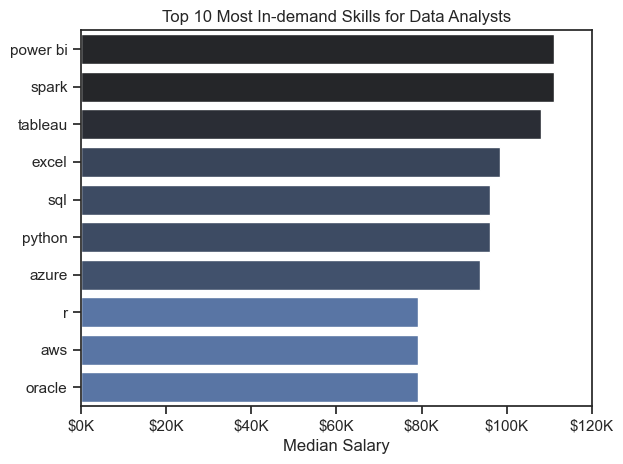

In [28]:

sns.set_theme(style= 'ticks')
ax = sns.barplot(data= df_india_top_skills, x= 'median', y= df_india_top_skills.index, hue= 'median', palette= 'dark:b_r', legend= False)
ax.set_title('Top 10 Most In-demand Skills for Data Analysts')
ax.set_xlim(0, 120000)
ax.set_xlabel('Median Salary')
ax.set_ylabel('')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()


In [30]:
df_india_top_pay = df_india_data_exploded.groupby('job_skills')['salary_year_avg'].agg(['count' , 'median']).sort_values(by= 'median' , ascending= False)
df_india_top_pay = df_india_top_pay.head(10)
df_india_top_pay

,count,median
job_skills,,
postgresql,1,165000.0
pyspark,1,165000.0
gitlab,1,165000.0
linux,1,165000.0
mysql,1,165000.0
gdpr,2,163782.0
mongodb,6,163782.0
scala,3,163782.0
neo4j,1,163782.0


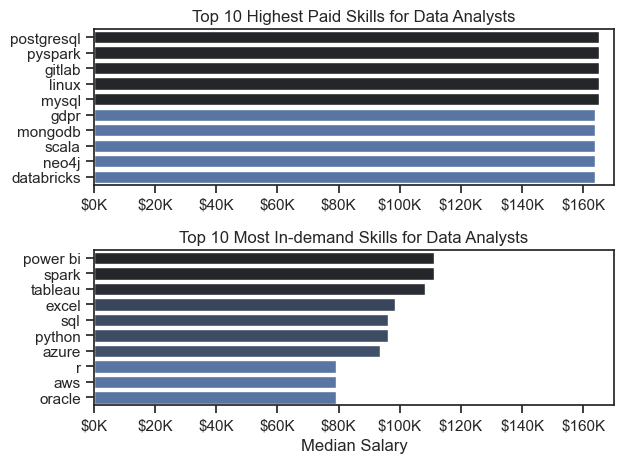

In [31]:
import seaborn as sns

sns.set_theme(style= 'ticks')

fig , ax = plt.subplots(2,1)

sns.barplot(data= df_india_top_pay, x= 'median', y= df_india_top_pay.index, ax= ax[0], hue= 'median', palette= 'dark:b_r')
ax[0].legend().remove()

ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_xlim(0,170000)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

sns.barplot(data= df_india_top_skills, x= 'median', y= df_india_top_skills.index, ax= ax[1], hue= 'median', palette= 'dark:b_r', legend= False)
ax[1].set_title('Top 10 Most In-demand Skills for Data Analysts')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_xlabel('Median Salary')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

fig.tight_layout()
plt.show()



In [ ]:
df_india[df_india['job_title_short'] == 'Data Analyst'].head(20)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,"[python, sql, aws, azure, excel, jenkins, git]","{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
27487,Data Analyst,Data Architect 2023,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-01-12 13:14:51,True,False,India,year,165000.0,NaN,Bosch Group,"[mongo, sql, python, mongodb, mongodb, sql ser...","{'analyst_tools': ['power bi'], 'cloud': ['azu..."
29583,Data Analyst,Senior Business & Data Analyst,India,via Ai-Jobs.net,Full-time,False,India,2023-11-21 13:12:12,False,False,India,year,119250.0,NaN,Deutsche Bank,"[sql, visio, excel, jira, confluence]","{'analyst_tools': ['visio', 'excel'], 'async':..."
32890,Data Analyst,Data Analyst - Transport,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-06-27 13:34:25,True,False,India,year,105000.0,NaN,GoTo Group,"[sql, swift, tableau, git]","{'analyst_tools': ['tableau'], 'other': ['git'..."
41257,Data Analyst,Junior Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-08-08 06:13:06,False,False,India,year,57500.0,NaN,WPP,"[sql, alteryx]","{'analyst_tools': ['alteryx'], 'programming': ..."
55883,Data Analyst,Product Owner with Tableau/Power BI(6 to 10 ye...,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-06-06 06:10:10,False,False,India,year,79200.0,NaN,insightsoftware,None,None
56450,Data Analyst,Data Analyst,"Chennai, Tamil Nadu, India",via Ai-Jobs.net,Full-time,False,India,2023-05-27 06:10:03,False,False,India,year,57500.0,NaN,Freshworks,"[tableau, power bi]","{'analyst_tools': ['tableau', 'power bi']}"
60135,Data Analyst,Senior Product Manager - Metrics (Chennai),"Chennai, Tamil Nadu, India",via Ai-Jobs.net,Full-time,False,India,2023-06-19 06:28:58,False,False,India,year,79200.0,NaN,Appian,"[excel, kubernetes]","{'analyst_tools': ['excel'], 'other': ['kubern..."
60528,Data Analyst,Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-07-15 06:10:30,False,False,India,year,105000.0,NaN,NielsenIQ,"[r, python, spss]","{'analyst_tools': ['spss'], 'programming': ['r..."
61483,Data Analyst,Executive - Credit Controller and Project Data...,"Hyderabad, Telangana, India",via Ai-Jobs.net,Full-time,False,India,2023-07-20 06:12:20,False,False,India,year,105000.0,NaN,Ramboll,"[excel, power bi]","{'analyst_tools': ['excel', 'power bi']}"


In [ ]:
df_india['job_via'].value_counts()

,count
job_via,
via Ai-Jobs.net,569
via Wellfound,4
via Infosec-Jobs.com,2
via Y Combinator,1
via Jooble,1
via LinkedIn,1
via Dice,1
via Blueprint Technologies - Talentify,1
via AngelList,1


In [ ]:
df_india['company_name'].value_counts().head(15)

,count
company_name,
Visa,45
Bosch Group,29
Databricks,17
Publicis Groupe,16
NielsenIQ,14
ServiceNow,13
Gartner,11
Capco,10
Zscaler,9
